In [2]:
!pip3 install vmdpy
!pip3 install PyEMD

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 2.1 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for PyEMD: filename=pyemd-1.0.0-cp39-cp39-macosx_10_9_universal2.whl size=262499 sha256=7ea6b4c2dba2bc420cedcb172227f7077574d25edeeec4f8866498cb27befe39
  Stored in directory: /Users/mango/Library/Caches/pip/wheels/a4/1a/ef/091c7c686d6248754cb3a29a984026fe1b1cc35b123f8f600c
Successfully built PyEMD

[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/pytho

In [4]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

In [15]:

data_path = '//Users/mango/Desktop/Thesis/data_inverter_tn.csv'

data = pd.read_csv(data_path)

print("Initial Data:\n", data.head())


Initial Data:
        id  device_id  A  AphaA  AphaB  AphaC  PPVphAB  PPVphBC  PPVphCA  \
0  726165        155  0      5      5      5        0        0        0   
1  726168        155  0      6      6      6        0        0        0   
2  726171        155  0      8      8      8        0        0        0   
3  726174        155  0     11     10     11        0        0        0   
4  726176        155  0     11     11     11        0        0        0   

   PPVphA  ...  Evt2  EvtVnd1  EvtVnd2  EvtVnd3  EvtVnd4  TmSrc  Tms  CRC16  \
0     234  ...     0        0        0        0        0      0    0   e602   
1     234  ...     0        0        0        0        0      0    0   d64a   
2     235  ...     0        0        0        0        0      0    0   a518   
3     234  ...     0        0        0        0        0      0    0   b5ea   
4     234  ...     0        0        0        0        0      0    0   60ac   

             sent_date  transaction_date  
0  2022-07-06 16

In [20]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
data = pd.read_csv(data_path)

# Preview the data
print("Initial Data Preview:")
print(data.head())

# Separate non-numeric columns
non_numeric_cols = ['sent_date', 'CRC16']
numeric_data = data.drop(columns=non_numeric_cols)

# Clean and convert data types for numeric columns
for column in numeric_data.columns:
    if numeric_data[column].dtype == 'object':
        numeric_data[column] = numeric_data[column].str.replace(',', '')
        numeric_data[column] = pd.to_numeric(numeric_data[column], errors='coerce')

# Function to process data in batches
def batch_impute(data, batch_size=10000):
    n_batches = len(data) // batch_size + int(len(data) % batch_size != 0)
    imputed_batches = []

    for i in range(n_batches):
        batch = data.iloc[i * batch_size:(i + 1) * batch_size]
        imputer = KNNImputer(n_neighbors=5)
        imputed_batch = imputer.fit_transform(batch)
        
        # Check the shape of the batch to ensure it matches the expected number of columns
        if imputed_batch.shape[1] != data.shape[1]:
            raise ValueError("Column mismatch after imputation in batch processing.")
        
        imputed_batches.append(imputed_batch)
        
        # Print progress
        print(f"Processed batch {i+1}/{n_batches}")

    return np.vstack(imputed_batches)

# Handling missing values using KNN Imputer in batches for numeric data
print("\nHandling missing values in batches...")
data_imputed_numeric = batch_impute(numeric_data)

# Convert back to DataFrame
data_imputed_numeric = pd.DataFrame(data_imputed_numeric, columns=numeric_data.columns)

# Combine imputed numeric data with non-numeric data
data_imputed = pd.concat([data_imputed_numeric, data[non_numeric_cols].reset_index(drop=True)], axis=1)

# Preview the imputed data
print("\nData after Imputation:")
print(data_imputed.head())

Initial Data Preview:
       id  device_id  A  AphaA  AphaB  AphaC  PPVphAB  PPVphBC  PPVphCA  \
0  726165        155  0      5      5      5        0        0        0   
1  726168        155  0      6      6      6        0        0        0   
2  726171        155  0      8      8      8        0        0        0   
3  726174        155  0     11     10     11        0        0        0   
4  726176        155  0     11     11     11        0        0        0   

   PPVphA  ...  Evt2  EvtVnd1  EvtVnd2  EvtVnd3  EvtVnd4  TmSrc  Tms  CRC16  \
0     234  ...     0        0        0        0        0      0    0   e602   
1     234  ...     0        0        0        0        0      0    0   d64a   
2     235  ...     0        0        0        0        0      0    0   a518   
3     234  ...     0        0        0        0        0      0    0   b5ea   
4     234  ...     0        0        0        0        0      0    0   60ac   

             sent_date  transaction_date  
0  2022-0


Detecting outliers using Isolation Forest...

Number of outliers detected:  4949


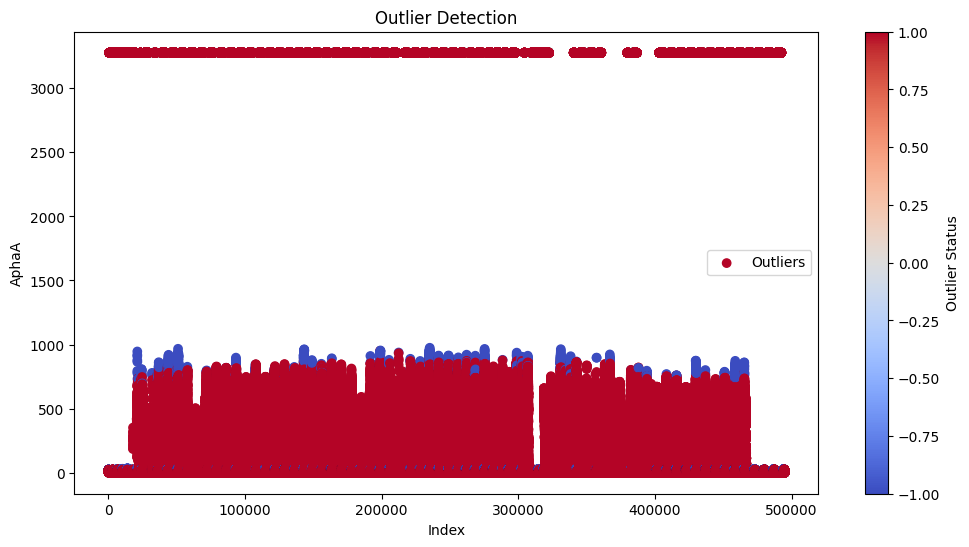


Performing additional data cleaning steps...

Data after additional cleaning:
          id  device_id    A  AphaA  AphaB  AphaC  PPVphAB  PPVphBC  PPVphCA  \
6   726182.0      155.0  0.0   11.0   11.0   11.0      0.0      0.0      0.0   
8   731447.0      155.0  0.0   10.0   10.0   10.0      0.0      0.0      0.0   
19  731478.0      155.0  0.0    9.0    9.0    9.0      0.0      0.0      0.0   
24  731492.0      155.0  0.0   12.0   12.0   12.0      0.0      0.0      0.0   
36  731526.0      155.0  0.0   19.0   19.0   19.0      0.0      0.0      0.0   

    PPVphA  ...  Evt2  EvtVnd1  EvtVnd2  EvtVnd3  EvtVnd4  TmSrc  Tms  \
6    234.0  ...   0.0      0.0      0.0      0.0      0.0    0.0  0.0   
8    235.0  ...   0.0      0.0      0.0      0.0      0.0    0.0  0.0   
19   235.0  ...   0.0      0.0      0.0      0.0      0.0    0.0  0.0   
24   236.0  ...   0.0      0.0      0.0      0.0      0.0    0.0  0.0   
36   236.0  ...   0.0      0.0      0.0      0.0      0.0    0.0  0.0   

 

In [24]:
import os
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Outlier Detection and Visualization
# Select only numeric columns for outlier detection
numeric_cols = data_imputed.select_dtypes(include=[np.number]).columns

# Detecting and removing outliers using Isolation Forest
print("\nDetecting outliers using Isolation Forest...")
iso_forest = IsolationForest(contamination=0.01, random_state=42)
outliers = iso_forest.fit_predict(data_imputed[numeric_cols])

# Add the outlier detection result to the DataFrame
data_imputed['outliers'] = outliers

# Visualizing the outliers
selected_column = 'AphaA'  # Replace with the actual numeric column name you want to visualize
print("\nNumber of outliers detected: ", (outliers == -1).sum())
plt.figure(figsize=(12, 6))
plt.scatter(data_imputed.index, data_imputed[selected_column], c=data_imputed['outliers'], cmap='coolwarm', label='Outliers')
plt.xlabel('Index')
plt.ylabel(selected_column)
plt.title('Outlier Detection')
plt.colorbar(label='Outlier Status')
plt.legend()
plt.show()

# Filter out outliers
data_cleaned = data_imputed[data_imputed['outliers'] == 1].drop(columns=['outliers'])

# Additional Data Cleaning Steps
print("\nPerforming additional data cleaning steps...")

# Remove duplicates
data_cleaned = data_cleaned.drop_duplicates()

# Ensure data types are correct
for column in data_cleaned.columns:
    if 'date' in column.lower():
        data_cleaned[column] = pd.to_datetime(data_cleaned[column])
    else:
        data_cleaned[column] = pd.to_numeric(data_cleaned[column], errors='coerce')

# Handle any remaining missing values
data_cleaned = data_cleaned.dropna()

# Preview the cleaned data
print("\nData after additional cleaning:")
print(data_cleaned.head())

# Save the cleaned data to a new CSV file
cleaned_data_path = './cleaned_data_inverter_tn.csv'  # Update this path as needed
data_cleaned.to_csv(cleaned_data_path, index=False)
print(f"\nCleaned data saved to {cleaned_data_path}")


In [28]:
# Data Normalization
from sklearn.preprocessing import StandardScaler

# Separate numeric columns from datetime columns
numeric_cols = data_cleaned.select_dtypes(include=[np.number]).columns
datetime_cols = data_cleaned.select_dtypes(include=[np.datetime64]).columns

# Normalizing numeric data
print("\nNormalizing numeric data...")
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_cleaned[numeric_cols])
data_cleaned_numeric = pd.DataFrame(scaled_features, columns=numeric_cols)

# Combine the normalized numeric data with the datetime data
data_cleaned = pd.concat([data_cleaned_numeric, data_cleaned[datetime_cols].reset_index(drop=True)], axis=1)

# Final Preview of the cleaned and normalized data
print("\nFinal Data Preview after Cleaning and Normalization:")
print(data_cleaned.head())



Normalizing numeric data...

Final Data Preview after Cleaning and Normalization:
         id  device_id    A     AphaA     AphaB     AphaC   PPVphAB   PPVphBC  \
0 -1.902354  -1.570525  0.0 -0.615910 -0.615902 -0.616050 -0.594203 -0.594335   
1 -1.875881  -1.570525  0.0 -0.616650 -0.616642 -0.616790 -0.594203 -0.594335   
2 -1.875725  -1.570525  0.0 -0.617390 -0.617382 -0.617530 -0.594203 -0.594335   
3 -1.875655  -1.570525  0.0 -0.615170 -0.615162 -0.615310 -0.594203 -0.594335   
4 -1.875484  -1.570525  0.0 -0.609989 -0.609981 -0.610128 -0.594203 -0.594335   

    PPVphCA    PPVphA  ...  Evt2  EvtVnd1  EvtVnd2  EvtVnd3  EvtVnd4  TmSrc  \
0 -0.594382  1.748962  ...   0.0      0.0      0.0      0.0      0.0    0.0   
1 -0.594382  1.758857  ...   0.0      0.0      0.0      0.0      0.0    0.0   
2 -0.594382  1.758857  ...   0.0      0.0      0.0      0.0      0.0    0.0   
3 -0.594382  1.768753  ...   0.0      0.0      0.0      0.0      0.0    0.0   
4 -0.594382  1.768753  ...   0.0   

In [13]:
# Extract additional features from date columns
data_cleaned['year'] = data_cleaned['sent_date'].dt.year
data_cleaned['month'] = data_cleaned['sent_date'].dt.month
data_cleaned['day'] = data_cleaned['sent_date'].dt.day
data_cleaned['hour'] = data_cleaned['sent_date'].dt.hour
data_cleaned['minute'] = data_cleaned['sent_date'].dt.minute


target_column = 'W'

numerical_features = data_cleaned.drop(columns=[target_column, 'sent_date', 'transaction_date']).select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
data_cleaned[numerical_features] = scaler.fit_transform(data_cleaned[numerical_features])

# Display the first few rows of the dataset after feature engineering
print("Data after feature engineering:\n", data_cleaned.head())


Data after feature engineering:
          id  device_id    A     AphaA     AphaB     AphaC   PPVphAB   PPVphBC  \
0 -1.900006  -1.549813  0.0 -0.617009 -0.617002 -0.617150 -0.593546 -0.593678   
1 -1.899991  -1.549813  0.0 -0.616266 -0.616258 -0.616407 -0.593546 -0.593678   
2 -1.899976  -1.549813  0.0 -0.614779 -0.614772 -0.614920 -0.593546 -0.593678   
3 -1.899960  -1.549813  0.0 -0.612550 -0.613285 -0.612690 -0.593546 -0.593678   
4 -1.899950  -1.549813  0.0 -0.612550 -0.612542 -0.612690 -0.593546 -0.593678   

    PPVphCA    PPVphA  ...  TmSrc  Tms  CRC16           sent_date  \
0 -0.593728  1.718545  ...    0.0  0.0   e602 2022-07-06 16:22:05   
1 -0.593728  1.718545  ...    0.0  0.0   d64a 2022-07-06 16:22:29   
2 -0.593728  1.728353  ...    0.0  0.0   a518 2022-07-06 16:22:53   
3 -0.593728  1.718545  ...    0.0  0.0   b5ea 2022-07-06 16:23:17   
4 -0.593728  1.718545  ...    0.0  0.0   60ac 2022-07-06 16:23:42   

               transaction_date  year  month  day  hour  minute  

In [29]:
# Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
train_data, test_data = train_test_split(data_cleaned, test_size=0.2, random_state=42)

# Preview the split data
print("\nTraining Data Preview:")
print(train_data.head())
print("\nTesting Data Preview:")
print(test_data.head())



Training Data Preview:
             id  device_id    A     AphaA     AphaB     AphaC   PPVphAB  \
11052 -1.265043  -1.570525  0.0  1.801440  1.801431  1.801393 -0.594203   
53545  0.472486   0.864434  0.0 -0.624052 -0.624044 -0.624192 -0.594203   
33015 -0.486100  -0.353046  0.0 -0.621091 -0.621083 -0.621231 -0.594203   
12296 -1.208241   0.864434  0.0 -0.624052 -0.624044 -0.624192 -0.594203   
20921 -0.946297   0.864434  0.0 -0.624052 -0.624044 -0.624192 -0.594203   

        PPVphBC   PPVphCA    PPVphA  ...  Evt2  EvtVnd1  EvtVnd2  EvtVnd3  \
11052 -0.594335 -0.594382 -0.566563  ...   0.0      0.0      0.0      0.0   
53545 -0.594335 -0.594382 -0.566563  ...   0.0      0.0      0.0      0.0   
33015 -0.594335 -0.594382  1.778648  ...   0.0      0.0      0.0      0.0   
12296 -0.594335 -0.594382 -0.566563  ...   0.0      0.0      0.0      0.0   
20921 -0.594335 -0.594382 -0.566563  ...   0.0      0.0      0.0      0.0   

       EvtVnd4  TmSrc  Tms     CRC16              transaction_

In [30]:
# Print column names to verify the correct column name
print("Columns in the dataset:")
print(data_cleaned.columns)


Columns in the dataset:
Index(['id', 'device_id', 'A', 'AphaA', 'AphaB', 'AphaC', 'PPVphAB', 'PPVphBC',
       'PPVphCA', 'PPVphA', 'PPVphB', 'PPVphC', 'W', 'Hz', 'VA', 'VAr', 'PF',
       'Wh', 'DCA', 'DCV', 'DCW', 'TmpCab', 'TmpSnk', 'TmpTrns', 'TmpOt', 'St',
       'StVnd', 'Evt1', 'Evt2', 'EvtVnd1', 'EvtVnd2', 'EvtVnd3', 'EvtVnd4',
       'TmSrc', 'Tms', 'CRC16', 'transaction_date', 'sent_date'],
      dtype='object')


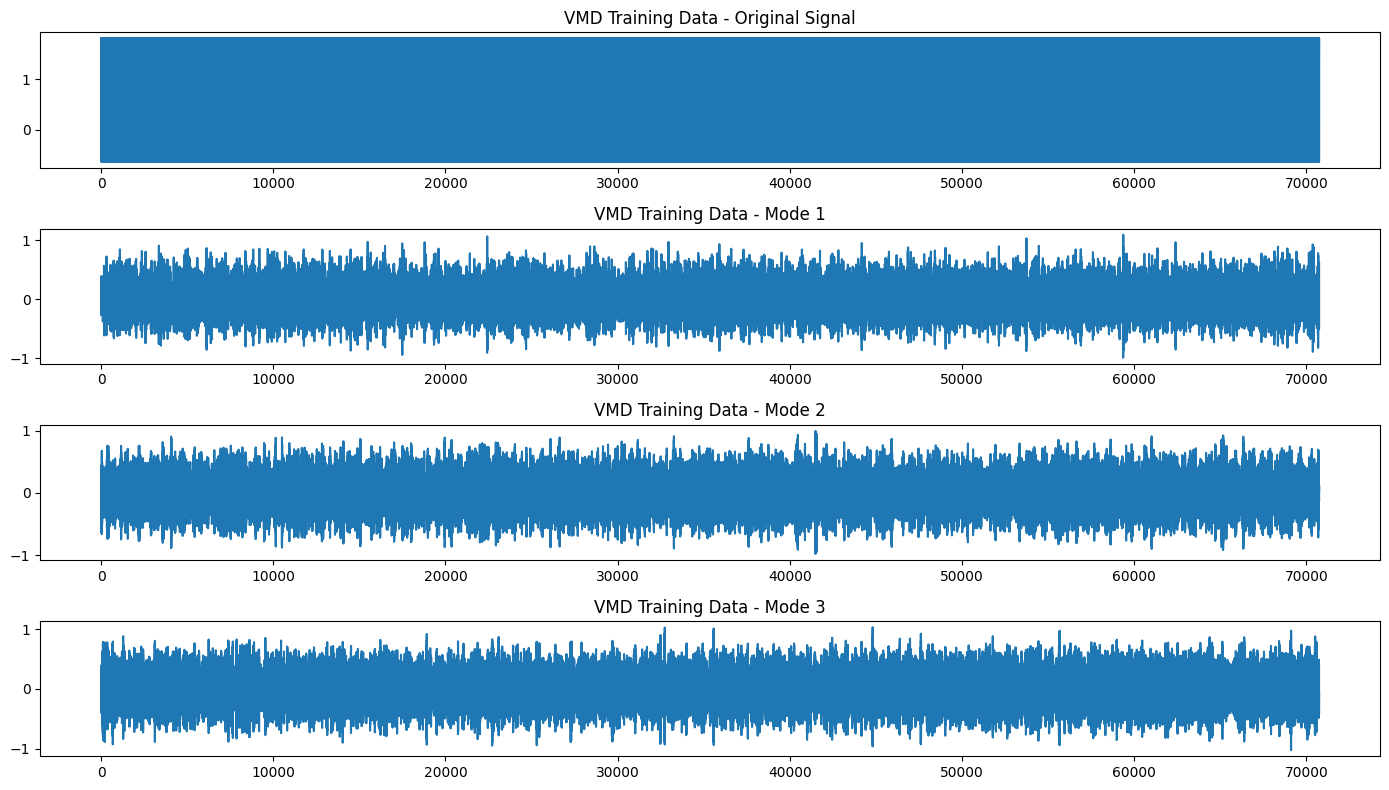

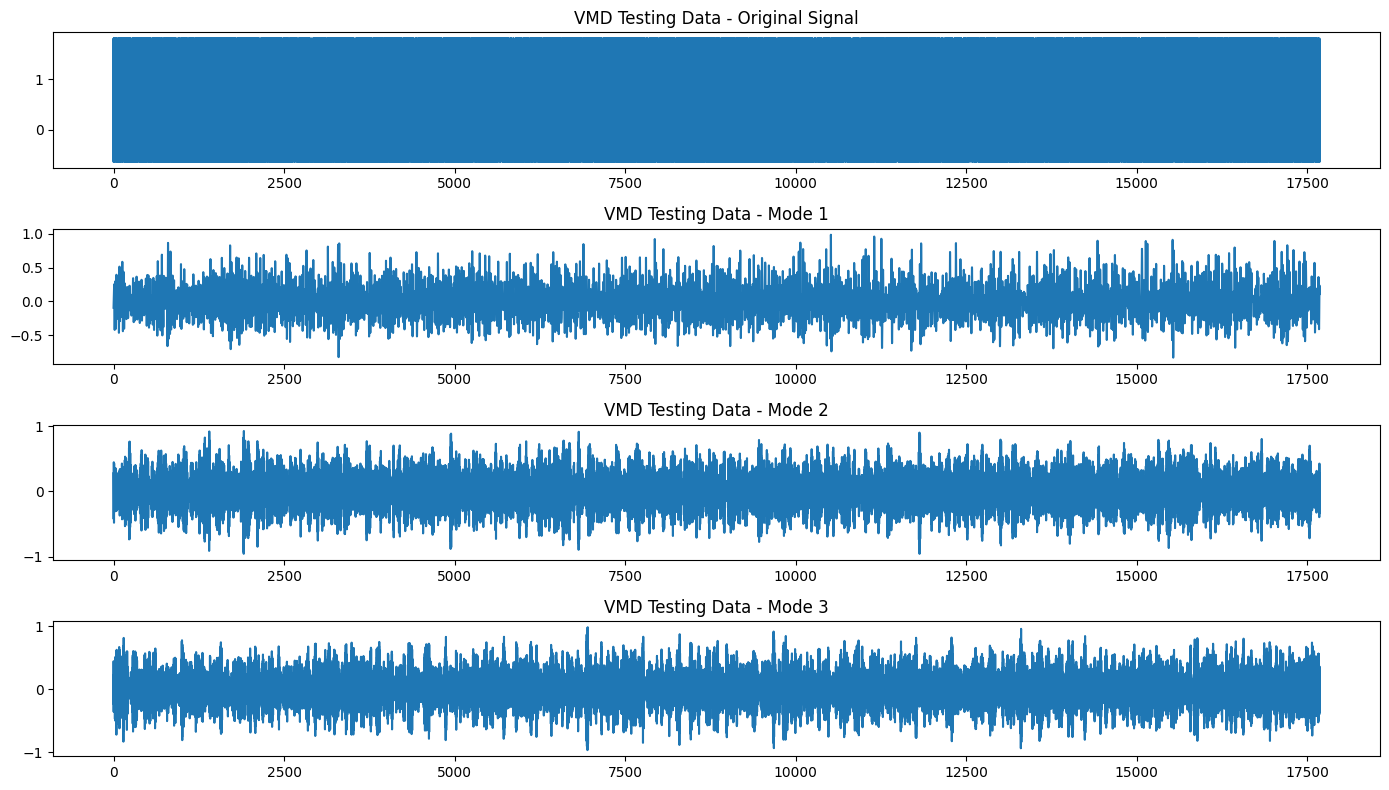

In [33]:
# Variational Mode Decomposition (VMD)
from vmdpy import VMD
import matplotlib.pyplot as plt

# Function to perform VMD
def perform_vmd(signal, alpha=2000, tau=0, K=3, DC=0, init=1, tol=1e-7):
    u, u_hat, omega = VMD(signal, alpha, tau, K, DC, init, tol)
    return u

# Verify and select the correct column
selected_column = 'AphaA'  # Replace with the correct column name from the dataset

# Ensure the selected column exists in the data
if selected_column not in data_cleaned.columns:
    raise ValueError(f"Column '{selected_column}' not found in the data")

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data_cleaned, test_size=0.2, random_state=42)

# Extract signals for VMD
train_signal = train_data[selected_column].values
test_signal = test_data[selected_column].values

# Apply VMD to training and testing data
vmd_modes_train = perform_vmd(train_signal)
vmd_modes_test = perform_vmd(test_signal)

# Function to plot VMD modes
def plot_modes(signal, modes, title):
    plt.figure(figsize=(14, 8))
    plt.subplot(len(modes) + 1, 1, 1)
    plt.plot(signal, label='Original Signal')
    plt.title(title + ' - Original Signal')
    for i, mode in enumerate(modes):
        plt.subplot(len(modes) + 1, 1, i + 2)
        plt.plot(mode, label=f'Mode {i+1}')
        plt.title(f'{title} - Mode {i+1}')
    plt.tight_layout()
    plt.show()

# Plot VMD modes
plot_modes(train_signal, vmd_modes_train, 'VMD Training Data')
plot_modes(test_signal, vmd_modes_test, 'VMD Testing Data')


In [46]:
!pip3 install EMD-signal
!pip3 install PyEMD




Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [56]:
!pip3 install --upgrade pip
!pip3 install EMD-signal --user


Defaulting to user installation because normal site-packages is not writeable


In [57]:
try:
    from PyEMD import CEEMDAN
    print("CEEMDAN imported successfully")
except ImportError as e:
    print("Error importing CEEMDAN:", e)


Error importing CEEMDAN: No module named 'PyEMD'


In [62]:
!pip install EMD-signal --user


In [63]:
import sys
print(sys.executable)
print(sys.path)



/Library/Developer/CommandLineTools/usr/bin/python3
['/Users/mango/Desktop/Thesis', '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python39.zip', '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9', '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/lib-dynload', '', '/Users/mango/Library/Python/3.9/lib/python/site-packages', '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/site-packages']


In [101]:

from PyEMD import CEEMDAN
import matplotlib.pyplot as plt

# Function to perform CEEMDAN
def perform_ceemdan(signal):
    ceemdan = CEEMDAN()
    IMFs = ceemdan(signal)
    return IMFs

# Verify and select the correct column
selected_column = 'AphaA'  

# Ensure the selected column exists in the data
if selected_column not in data_cleaned.columns:
    raise ValueError(f"Column '{selected_column}' not found in the data")

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data_cleaned, test_size=0.2, random_state=42)

# Extract signals for CEEMDAN
train_signal = train_data[selected_column].values
test_signal = test_data[selected_column].values

# Apply CEEMDAN to training and testing data
ceemdan_imfs_train = perform_ceemdan(train_signal)
ceemdan_imfs_test = perform_ceemdan(test_signal)

# Function to plot CEEMDAN IMFs
def plot_modes(signal, modes, title):
    plt.figure(figsize=(14, 8))
    plt.subplot(len(modes) + 1, 1, 1)
    plt.plot(signal, label='Original Signal')
    plt.title(title + ' - Original Signal')
    for i, mode in enumerate(modes):
        plt.subplot(len(modes) + 1, 1, i + 2)
        plt.plot(mode, label=f'Mode {i+1}')
        plt.title(f'{title} - Mode {i+1}')
    plt.tight_layout()
    plt.show()

# Plot CEEMDAN IMFs
plot_modes(train_signal, ceemdan_imfs_train, 'CEEMDAN Training Data')
plot_modes(test_signal, ceemdan_imfs_test, 'CEEMDAN Testing Data')


ModuleNotFoundError: No module named 'PyEMD'

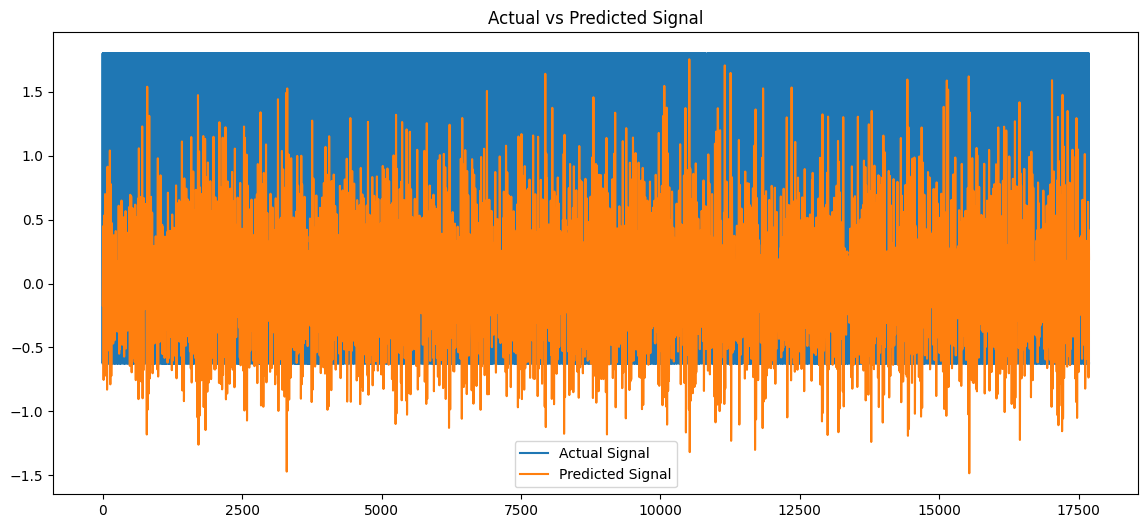

NameError: name 'ceemdan_imfs_train' is not defined

In [64]:
# Basic Modeling Example with Linear Regression
from sklearn.linear_model import LinearRegression

def train_and_evaluate_model(train_modes, test_modes, original_train_signal, original_test_signal):
    # Train a simple model on the first mode
    model = LinearRegression()
    model.fit(train_modes[0].reshape(-1, 1), original_train_signal)
    
    # Predict on the training and testing sets
    train_predictions = model.predict(train_modes[0].reshape(-1, 1))
    test_predictions = model.predict(test_modes[0].reshape(-1, 1))
    
    # Plot predictions vs actual
    plt.figure(figsize=(14, 6))
    plt.plot(original_test_signal, label='Actual Signal')
    plt.plot(test_predictions, label='Predicted Signal')
    plt.title('Actual vs Predicted Signal')
    plt.legend()
    plt.show()

# Train and evaluate using the first VMD mode
train_and_evaluate_model(vmd_modes_train, vmd_modes_test, train_signal, test_signal)

# Train and evaluate using the first CEEMDAN IMF
train_and_evaluate_model(ceemdan_imfs_train, ceemdan_imfs_test, train_signal, test_signal)


In [ ]:
# Take two!

In [80]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.model_selection import train_test_split
from datetime import datetime

# Load data
data_path = 'data_inverter_tn.csv'  
data = pd.read_csv(data_path)

# Print the column names to verify
print("Columns in the dataset:\n", data.columns)

# Columns that should not be converted to floats
exclude_columns = ['id', 'device_id', 'transaction_date', 'sent_date']

# Drop the 'CRC16' column as it cannot be converted to float
if 'CRC16' in data.columns:
    data.drop(columns=['CRC16'], inplace=True)

# Data cleaning: Remove commas and convert to numeric where applicable
for column in data.columns:
    if column not in exclude_columns:
        if data[column].dtype == 'object':
            data[column] = data[column].str.replace(',', '').astype(float)

# Identify any remaining non-numeric columns
non_numeric_columns = data.select_dtypes(include=['object']).columns
print("Non-numeric columns remaining:\n", non_numeric_columns)

# Print initial data to verify the cleaning
print("Initial Data after cleaning:\n", data.head())


Columns in the dataset:
 Index(['id', 'device_id', 'A', 'AphaA', 'AphaB', 'AphaC', 'PPVphAB', 'PPVphBC',
       'PPVphCA', 'PPVphA', 'PPVphB', 'PPVphC', 'W', 'Hz', 'VA', 'VAr', 'PF',
       'Wh', 'DCA', 'DCV', 'DCW', 'TmpCab', 'TmpSnk', 'TmpTrns', 'TmpOt', 'St',
       'StVnd', 'Evt1', 'Evt2', 'EvtVnd1', 'EvtVnd2', 'EvtVnd3', 'EvtVnd4',
       'TmSrc', 'Tms', 'CRC16', 'sent_date', 'transaction_date'],
      dtype='object')
Non-numeric columns remaining:
 Index(['sent_date'], dtype='object')
Initial Data after cleaning:
        id  device_id  A  AphaA  AphaB  AphaC  PPVphAB  PPVphBC  PPVphCA  \
0  726165        155  0      5      5      5        0        0        0   
1  726168        155  0      6      6      6        0        0        0   
2  726171        155  0      8      8      8        0        0        0   
3  726174        155  0     11     10     11        0        0        0   
4  726176        155  0     11     11     11        0        0        0   

   PPVphA  ...   Evt1  

In [81]:
# Handle datetime columns if they exist
if 'transaction_date' in data.columns:
    data['transaction_date'] = pd.to_datetime(data['transaction_date'], unit='s')
if 'sent_date' in data.columns:
    data['sent_date'] = pd.to_datetime(data['sent_date'])

# Feature Engineering: adding temporal features if transaction_date exists
if 'transaction_date' in data.columns:
    data['hour'] = data['transaction_date'].dt.hour
    data['dayofweek'] = data['transaction_date'].dt.dayofweek
    data['month'] = data['transaction_date'].dt.month
    data.drop(columns=['transaction_date'], inplace=True)
if 'sent_date' in data.columns:
    data.drop(columns=['sent_date'], inplace=True)

# Print data to verify the feature engineering
print("Data after feature engineering:\n", data.head())


Data after feature engineering:
        id  device_id  A  AphaA  AphaB  AphaC  PPVphAB  PPVphBC  PPVphCA  \
0  726165        155  0      5      5      5        0        0        0   
1  726168        155  0      6      6      6        0        0        0   
2  726171        155  0      8      8      8        0        0        0   
3  726174        155  0     11     10     11        0        0        0   
4  726176        155  0     11     11     11        0        0        0   

   PPVphA  ...  Evt2  EvtVnd1  EvtVnd2  EvtVnd3  EvtVnd4  TmSrc  Tms  hour  \
0     234  ...     0        0        0        0        0      0    0     9   
1     234  ...     0        0        0        0        0      0    0     9   
2     235  ...     0        0        0        0        0      0    0     9   
3     234  ...     0        0        0        0        0      0    0     9   
4     234  ...     0        0        0        0        0      0    0     9   

   dayofweek  month  
0          2      7  
1  

In [91]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from datetime import datetime

# Define the batch size
batch_size = 10000  

# Function to process each batch
def process_batch(batch):
    # Columns that should not be converted to floats
    exclude_columns = ['id', 'device_id', 'transaction_date', 'sent_date', 'CRC16']

    # Drop the 'CRC16' column as it cannot be converted to float
    if 'CRC16' in batch.columns:
        batch.drop(columns=['CRC16'], inplace=True)

    # Data cleaning: Remove commas and convert to numeric where applicable
    for column in batch.columns:
        if column not in exclude_columns:
            if batch[column].dtype == 'object':
                batch[column] = batch[column].str.replace(',', '').astype(float)

    # Handle datetime columns if they exist
    if 'transaction_date' in batch.columns:
        batch['transaction_date'] = pd.to_datetime(batch['transaction_date'], unit='s')
    if 'sent_date' in batch.columns:
        batch['sent_date'] = pd.to_datetime(batch['sent_date'])

    if 'transaction_date' in batch.columns:
        batch['hour'] = batch['transaction_date'].dt.hour
        batch['dayofweek'] = batch['transaction_date'].dt.dayofweek
        batch['month'] = batch['transaction_date'].dt.month
        batch.drop(columns=['transaction_date'], inplace=True)
    if 'sent_date' in batch.columns:
        batch.drop(columns=['sent_date'], inplace=True)

    imputer = SimpleImputer(strategy='mean')
    batch_imputed = imputer.fit_transform(batch)

    batch = pd.DataFrame(batch_imputed, columns=batch.columns)

    # Outlier detection and removal using Isolation Forest
    isolation_forest = IsolationForest(contamination=0.1)
    batch['outliers'] = isolation_forest.fit_predict(batch)
    batch = batch[batch['outliers'] == 1]
    batch.drop(columns=['outliers'], inplace=True)

    return batch

# Initialize lists to store processed batches
processed_batches = []

# Read and process the data in chunks
for chunk in pd.read_csv(data_path, chunksize=batch_size):
    print(f"Processing a chunk of size: {chunk.shape}")
    processed_chunk = process_batch(chunk)
    processed_batches.append(processed_chunk)

# Concatenate all processed batches
data_processed = pd.concat(processed_batches, ignore_index=True)
print(f"Total processed data size: {data_processed.shape}")

# Scaling features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_processed)

# Dimensionality reduction
pca = PCA(n_components=10)  
data_pca = pca.fit_transform(data_scaled)

X = data_pca
y = data_processed['A'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print data to verify splitting
print("Training Data Preview:\n", X_train[:5])


Processing a chunk of size: (10000, 38)
Processing a chunk of size: (10000, 38)
Processing a chunk of size: (10000, 38)
Processing a chunk of size: (10000, 38)
Processing a chunk of size: (10000, 38)
Processing a chunk of size: (10000, 38)
Processing a chunk of size: (10000, 38)
Processing a chunk of size: (10000, 38)
Processing a chunk of size: (10000, 38)
Processing a chunk of size: (10000, 38)
Processing a chunk of size: (10000, 38)
Processing a chunk of size: (10000, 38)
Processing a chunk of size: (10000, 38)
Processing a chunk of size: (10000, 38)
Processing a chunk of size: (10000, 38)
Processing a chunk of size: (10000, 38)
Processing a chunk of size: (10000, 38)
Processing a chunk of size: (10000, 38)
Processing a chunk of size: (10000, 38)
Processing a chunk of size: (10000, 38)
Processing a chunk of size: (10000, 38)
Processing a chunk of size: (10000, 38)
Processing a chunk of size: (10000, 38)
Processing a chunk of size: (10000, 38)
Processing a chunk of size: (10000, 38)


In [93]:
!pip3 install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 12.5 MB/s eta 0:00:00a 0:00:01


In [98]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Train a Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gbr.fit(X_train, y_train)

# Evaluate the model
y_pred = gbr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Gradient Boosting Regressor MAE: {mae}, MSE: {mse}, MAPE: {mape}')


Gradient Boosting Regressor MAE: 0.0, MSE: 0.0, MAPE: 0.0


In [99]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Grid Search model
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

# Fit the Grid Search model
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Optimized Gradient Boosting Regressor MAE: {mae}, MSE: {mse}, MAPE: {mape}')


Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=2

Epoch 1/100


W0000 00:00:1721748326.240473       1 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" model: "0" frequency: 2400 num_cores: 10 environment { key: "cpu_instruction_set" value: "ARM NEON" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 16384 l2_cache_size: 524288 l3_cache_size: 524288 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


11132/11137 [============================>.] - ETA: 0s - loss: 1.7440e-07 - mae: 2.4389e-05 - mse: 1.7440e-07 - mape: 24389.1855

W0000 00:00:1721748393.878983       1 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" model: "0" frequency: 2400 num_cores: 10 environment { key: "cpu_instruction_set" value: "ARM NEON" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 16384 l2_cache_size: 524288 l3_cache_size: 524288 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


11137/11137 [==============================] - 73s 6ms/step - loss: 1.7432e-07 - mae: 2.4378e-05 - mse: 1.7432e-07 - mape: 24378.5586 - val_loss: 3.5511e-14 - val_mae: 1.8844e-07 - val_mse: 3.5511e-14 - val_mape: 188.4391 - lr: 0.0010
Epoch 2/100
11137/11137 [==============================] - 67s 6ms/step - loss: 7.4175e-10 - mae: 1.1867e-05 - mse: 7.4175e-10 - mape: 11866.6270 - val_loss: 4.2369e-12 - val_mae: 2.0584e-06 - val_mse: 4.2369e-12 - val_mape: 2058.4565 - lr: 0.0010
Epoch 3/100
11137/11137 [==============================] - 67s 6ms/step - loss: 7.2367e-10 - mae: 1.1951e-05 - mse: 7.2367e-10 - mape: 11950.7080 - val_loss: 1.1346e-11 - val_mae: 3.3685e-06 - val_mse: 1.1346e-11 - val_mape: 3368.4404 - lr: 0.0010
Epoch 4/100
11137/11137 [==============================] - 67s 6ms/step - loss: 7.3060e-10 - mae: 1.2115e-05 - mse: 7.3060e-10 - mape: 12114.7061 - val_loss: 5.8452e-14 - val_mae: 2.4177e-07 - val_mse: 5.8452e-14 - val_mape: 241.7683 - lr: 0.0010
Epoch 5/100
11137/1113

W0000 00:00:1721750613.790624       1 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" model: "0" frequency: 2400 num_cores: 10 environment { key: "cpu_instruction_set" value: "ARM NEON" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 16384 l2_cache_size: 524288 l3_cache_size: 524288 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


2785/2785 [==============================] - 5s 2ms/step
LSTM with Attention MAE: 8.381877414365135e-10, MSE: 7.025586898944436e-19, MAPE: 3774862.0


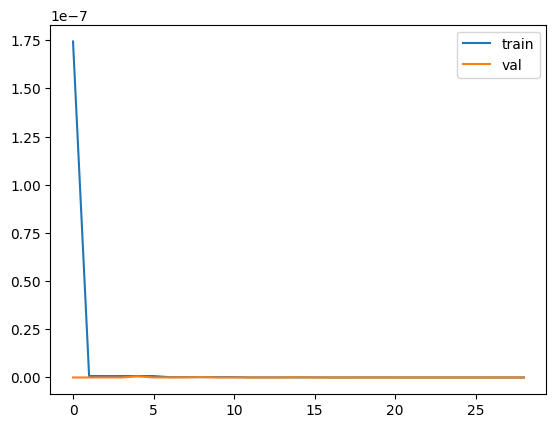

In [102]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Dropout, Attention, Flatten, concatenate
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the LSTM with Attention model
def create_lstm_attention_model(input_shape):
    lstm_input = Input(shape=input_shape)
    lstm_out = LSTM(50, return_sequences=True)(lstm_input)
    lstm_out = Dropout(0.2)(lstm_out)
    lstm_out = LSTM(50, return_sequences=True)(lstm_out)
    lstm_out = Dropout(0.2)(lstm_out)
    lstm_out = LSTM(50, return_sequences=True)(lstm_out)

    attention = Attention()([lstm_out, lstm_out])
    attention = Flatten()(attention)

    combined = concatenate([attention, Flatten()(lstm_out)])
    combined = Dense(50, activation='relu')(combined)
    combined = Dropout(0.2)(combined)
    output = Dense(1)(combined)

    model = Model(inputs=lstm_input, outputs=output)
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse', 'mape'])
    return model

input_shape = (X_train.shape[1], 1)
model = create_lstm_attention_model(input_shape)

# Reshape data for LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Train the model
history = model.fit(X_train_lstm, y_train, validation_data=(X_test_lstm, y_test), epochs=100, batch_size=32, callbacks=[early_stopping, reduce_lr])

# Evaluate the model
y_pred = model.predict(X_test_lstm)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'LSTM with Attention MAE: {mae}, MSE: {mse}, MAPE: {mape}')

# Plot the loss curve
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()


In [19]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Load the data
data_path = 'data_inverter_tn.csv'
data = pd.read_csv(data_path)

# Preview the data
print("Initial Data Preview:")
print(data.head())

# Separate non-numeric columns
non_numeric_cols = ['sent_date', 'CRC16']
numeric_data = data.drop(columns=non_numeric_cols)

# Clean and convert data types for numeric columns
for column in numeric_data.columns:
    if numeric_data[column].dtype == 'object':
        numeric_data[column] = numeric_data[column].str.replace(',', '')
        numeric_data[column] = pd.to_numeric(numeric_data[column], errors='coerce')

# Function to process data in batches
def batch_impute(data, batch_size=10000):
    n_batches = len(data) // batch_size + int(len(data) % batch_size != 0)
    imputed_batches = []

    for i in range(n_batches):
        batch = data.iloc[i * batch_size:(i + 1) * batch_size]
        imputer = KNNImputer(n_neighbors=5)
        imputed_batch = imputer.fit_transform(batch)
        
        # Check the shape of the batch to ensure it matches the expected number of columns
        if imputed_batch.shape[1] != data.shape[1]:
            raise ValueError("Column mismatch after imputation in batch processing.")
        
        imputed_batches.append(imputed_batch)
        
        # Print progress
        print(f"Processed batch {i+1}/{n_batches}")

    return np.vstack(imputed_batches)

# Handling missing values using KNN Imputer in batches for numeric data
print("\nHandling missing values in batches...")
data_imputed_numeric = batch_impute(numeric_data)

# Convert back to DataFrame
data_imputed_numeric = pd.DataFrame(data_imputed_numeric, columns=numeric_data.columns)

# Combine imputed numeric data with non-numeric data
data_imputed = pd.concat([data_imputed_numeric, data[non_numeric_cols].reset_index(drop=True)], axis=1)

# Preview the imputed data
print("\nData after Imputation:")
print(data_imputed.head())

# Check column names
print("\nColumn names after imputation:")
print(data_imputed.columns)

# Continue with removing outliers and normalizing data
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler

# Removing Outliers
print("\nRemoving outliers...")
iso_forest = IsolationForest(contamination=0.01)
outliers = iso_forest.fit_predict(data_imputed_numeric)
data_cleaned = data_imputed_numeric[outliers == 1]

# Normalizing Data
print("\nNormalizing the data...")
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data_cleaned), columns=data_cleaned.columns)

# Check column names again
print("\nColumn names after normalization:")
print(data_normalized.columns)

# Define features and lags
features = data_normalized.columns
lags = [1, 2, 3]
windows = [3, 7, 14]

# Create lag and rolling features
def create_lag_features(df, lags, column):
    for lag in lags:
        df[f'{column}_lag_{lag}'] = df[column].shift(lag)
    return df

def create_rolling_features(df, windows, column):
    for window in windows:
        df[f'{column}_roll_mean_{window}'] = df[column].rolling(window=window).mean()
        df[f'{column}_roll_std_{window}'] = df[column].rolling(window=window).std()
    return df

print("\nCreating lag and rolling features for the train data...")
for feature in features:
    data_normalized = create_lag_features(data_normalized, lags, feature)
    data_normalized = create_rolling_features(data_normalized, windows, feature)

# Dropping NaN values caused by lag/rolling features
data_normalized.dropna(inplace=True)

print("\nData after feature engineering:")
print(data_normalized.head())


Initial Data Preview:
       id  device_id  A  AphaA  AphaB  AphaC  PPVphAB  PPVphBC  PPVphCA  \
0  726165        155  0      5      5      5        0        0        0   
1  726168        155  0      6      6      6        0        0        0   
2  726171        155  0      8      8      8        0        0        0   
3  726174        155  0     11     10     11        0        0        0   
4  726176        155  0     11     11     11        0        0        0   

   PPVphA  ...  Evt2  EvtVnd1  EvtVnd2  EvtVnd3  EvtVnd4  TmSrc  Tms  CRC16  \
0     234  ...     0        0        0        0        0      0    0   e602   
1     234  ...     0        0        0        0        0      0    0   d64a   
2     235  ...     0        0        0        0        0      0    0   a518   
3     234  ...     0        0        0        0        0      0    0   b5ea   
4     234  ...     0        0        0        0        0      0    0   60ac   

             sent_date  transaction_date  
0  2022-0

/var/folders/m7/4z7bg8rd1b530s_xvwr091nm0000gn/T/ipykernel_76580/1272525397.py:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{column}_lag_{lag}'] = df[column].shift(lag)
/var/folders/m7/4z7bg8rd1b530s_xvwr091nm0000gn/T/ipykernel_76580/1272525397.py:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{column}_lag_{lag}'] = df[column].shift(lag)
/var/folders/m7/4z7bg8rd1b530s_xvwr091nm0000gn/T/ipykernel_76580/1272525397.py:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f


Data after feature engineering:
          id  device_id    A     AphaA     AphaB     AphaC  PPVphAB  PPVphBC  \
13  0.007718        0.0  0.0  0.003052  0.003052  0.003052      0.0      0.0   
14  0.007723        0.0  0.0  0.003052  0.003052  0.003052      0.0      0.0   
15  0.007727        0.0  0.0  0.002746  0.002746  0.002746      0.0      0.0   
16  0.007732        0.0  0.0  0.002746  0.002746  0.002746      0.0      0.0   
17  0.007736        0.0  0.0  0.002746  0.002746  0.002746      0.0      0.0   

    PPVphCA    PPVphA  ...  Tms_roll_std_14  transaction_date_lag_1  \
13      0.0  0.963115  ...              0.0                0.004763   
14      0.0  0.963115  ...              0.0                0.004765   
15      0.0  0.963115  ...              0.0                0.004767   
16      0.0  0.963115  ...              0.0                0.004768   
17      0.0  0.963115  ...              0.0                0.004770   

    transaction_date_lag_2  transaction_date_lag_3  \
13   

In [3]:
from sklearn.ensemble import IsolationForest

# Remove outliers using Isolation Forest
def remove_outliers(data, contamination=0.01):
    iso_forest = IsolationForest(contamination=contamination)
    outliers = iso_forest.fit_predict(data)
    data_cleaned = data[outliers == 1]
    return data_cleaned

# Apply outlier removal
print("\nRemoving outliers...")
data_cleaned = remove_outliers(data_imputed_numeric)

# Combine cleaned numeric data with non-numeric data
data_cleaned_combined = pd.concat([data_cleaned, data[non_numeric_cols].reset_index(drop=True)], axis=1)

# Preview the cleaned data
print("\nData after Removing Outliers:")
print(data_cleaned_combined.head())



Removing outliers...

Data after Removing Outliers:
         id  device_id    A  AphaA  AphaB  AphaC  PPVphAB  PPVphBC  PPVphCA  \
0  726165.0      155.0  0.0    5.0    5.0    5.0      0.0      0.0      0.0   
1  726168.0      155.0  0.0    6.0    6.0    6.0      0.0      0.0      0.0   
2  726171.0      155.0  0.0    8.0    8.0    8.0      0.0      0.0      0.0   
3  726174.0      155.0  0.0   11.0   10.0   11.0      0.0      0.0      0.0   
4  726176.0      155.0  0.0   11.0   11.0   11.0      0.0      0.0      0.0   

   PPVphA  ...  Evt2  EvtVnd1  EvtVnd2  EvtVnd3  EvtVnd4  TmSrc  Tms  \
0   234.0  ...   0.0      0.0      0.0      0.0      0.0    0.0  0.0   
1   234.0  ...   0.0      0.0      0.0      0.0      0.0    0.0  0.0   
2   235.0  ...   0.0      0.0      0.0      0.0      0.0    0.0  0.0   
3   234.0  ...   0.0      0.0      0.0      0.0      0.0    0.0  0.0   
4   234.0  ...   0.0      0.0      0.0      0.0      0.0    0.0  0.0   

   transaction_date            sent_dat

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the numeric data
def normalize_data(data):
    scaler = MinMaxScaler()
    data_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
    return data_normalized

# Apply normalization
print("\nNormalizing the data...")
data_normalized = normalize_data(data_cleaned)

# Combine normalized numeric data with non-numeric data
data_normalized_combined = pd.concat([data_normalized, data[non_numeric_cols].reset_index(drop=True)], axis=1)

# Preview the normalized data
print("\nData after Normalization:")
print(data_normalized_combined.head())



Normalizing the data...

Data after Normalization:
         id  device_id    A     AphaA     AphaB     AphaC  PPVphAB  PPVphBC  \
0  0.000000        0.0  0.0  0.001526  0.001526  0.001526      0.0      0.0   
1  0.000004        0.0  0.0  0.001831  0.001831  0.001831      0.0      0.0   
2  0.000009        0.0  0.0  0.002441  0.002441  0.002441      0.0      0.0   
3  0.000013        0.0  0.0  0.003357  0.003052  0.003357      0.0      0.0   
4  0.000016        0.0  0.0  0.003357  0.003357  0.003357      0.0      0.0   

   PPVphCA    PPVphA  ...  Evt2  EvtVnd1  EvtVnd2  EvtVnd3  EvtVnd4  TmSrc  \
0      0.0  0.959016  ...   0.0      0.0      0.0      0.0      0.0    0.0   
1      0.0  0.959016  ...   0.0      0.0      0.0      0.0      0.0    0.0   
2      0.0  0.963115  ...   0.0      0.0      0.0      0.0      0.0    0.0   
3      0.0  0.959016  ...   0.0      0.0      0.0      0.0      0.0    0.0   
4      0.0  0.959016  ...   0.0      0.0      0.0      0.0      0.0    0.0   

   T

In [8]:
# Assuming the data has a datetime column named 'sent_date'
data_normalized_combined['sent_date'] = pd.to_datetime(data_normalized_combined['sent_date'])
data_normalized_combined.sort_values('sent_date', inplace=True)

# Splitting data
train_data = data_normalized_combined[data_normalized_combined['sent_date'] < '2022-12-01']
test_data = data_normalized_combined[data_normalized_combined['sent_date'] >= '2022-12-01']

# Drop the 'sent_date' and 'CRC16' columns as they are not features
train_data = train_data.drop(columns=['sent_date', 'CRC16'])
test_data = test_data.drop(columns=['sent_date', 'CRC16'])

# Checking the head of the train and test data
print("\nTrain Data:")
print(train_data.head())
print("\nTest Data:")
print(test_data.head())



Train Data:
         id  device_id    A     AphaA     AphaB     AphaC  PPVphAB  PPVphBC  \
0  0.000000        0.0  0.0  0.001526  0.001526  0.001526      0.0      0.0   
1  0.000004        0.0  0.0  0.001831  0.001831  0.001831      0.0      0.0   
2  0.000009        0.0  0.0  0.002441  0.002441  0.002441      0.0      0.0   
3  0.000013        0.0  0.0  0.003357  0.003052  0.003357      0.0      0.0   
4  0.000016        0.0  0.0  0.003357  0.003357  0.003357      0.0      0.0   

   PPVphCA    PPVphA  ...  StVnd  Evt1  Evt2  EvtVnd1  EvtVnd2  EvtVnd3  \
0      0.0  0.959016  ...    0.0   1.0   0.0      0.0      0.0      0.0   
1      0.0  0.959016  ...    0.0   1.0   0.0      0.0      0.0      0.0   
2      0.0  0.963115  ...    0.0   1.0   0.0      0.0      0.0      0.0   
3      0.0  0.959016  ...    0.0   1.0   0.0      0.0      0.0      0.0   
4      0.0  0.959016  ...    0.0   1.0   0.0      0.0      0.0      0.0   

   EvtVnd4  TmSrc  Tms  transaction_date  
0      0.0    0.0 

In [16]:
# Correcting Feature Engineering Code
def create_lag_features(df, lags, column):
    lag_features = {f'{column}_lag_{lag}': df[column].shift(lag) for lag in lags}
    return pd.DataFrame(lag_features)

def create_rolling_features(df, windows, column):
    roll_features = {}
    for window in windows:
        roll_features[f'{column}_roll_mean_{window}'] = df[column].rolling(window=window).mean()
        roll_features[f'{column}_roll_std_{window}'] = df[column].rolling(window=window).std()
    return pd.DataFrame(roll_features)

features = ['PPVphA', 'PPVphB', 'PPVphC', 'W', 'Hz', 'VA', 'VAr', 'TmpCab', 'TmpSnk', 'TmpTrns', 'TmpOt', 'DCA', 'DCV', 'DCW', 'Wh']
lags = [1, 2, 3]
windows = [3, 7, 14]

# Using pd.concat to avoid performance warning
print("\nCreating lag and rolling features for the train data...")
lag_roll_features_train = pd.DataFrame(index=train_data.index)
lag_roll_features_test = pd.DataFrame(index=test_data.index)

for feature in features:
    lag_features_train = create_lag_features(train_data, lags, feature)
    roll_features_train = create_rolling_features(train_data, windows, feature)
    lag_features_test = create_lag_features(test_data, lags, feature)
    roll_features_test = create_rolling_features(test_data, windows, feature)

    lag_roll_features_train = pd.concat([lag_roll_features_train, lag_features_train, roll_features_train], axis=1)
    lag_roll_features_test = pd.concat([lag_roll_features_test, lag_features_test, roll_features_test], axis=1)

# Drop original feature columns as they have been transformed
train_data = train_data.drop(columns=features)
test_data = test_data.drop(columns=features)

# Concatenate original data with lag and rolling features
train_data = pd.concat([train_data, lag_roll_features_train], axis=1)
test_data = pd.concat([test_data, lag_roll_features_test], axis=1)

# Dropping NaN values caused by lag/rolling features
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

# Checking the head of the train data after feature engineering
print("\nTrain Data after Feature Engineering:")
print(train_data.head())

# Checking the head of the test data after feature engineering
print("\nTest Data after Feature Engineering:")
print(test_data.head())



Creating lag and rolling features for the train data...


KeyError: 'PPVphA'

In [18]:
!pip3 install xgboost tcn tensorflow fbprophet


Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement tcn (from versions: none)
ERROR: No matching distribution found for tcn

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [15]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tcn import TCN
from fbprophet import Prophet

# Prepare training data
X_train = train_data.drop(['Wh'], axis=1)
y_train = train_data['Wh']

# Prepare testing data
X_test = test_data.drop(['Wh'], axis=1)
y_test = test_data['Wh']

# Model 1: Temporal Convolutional Network (TCN)
tcn_model = Sequential([TCN(input_shape=(X_train.shape[1],), nb_filters=64, kernel_size=3, dilations=[1, 2, 4, 8, 16, 32, 64]), Dense(1)])
tcn_model.compile(optimizer='adam', loss='mean_squared_error')
tcn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

# Model 2: Prophet
prophet_data = train_data[['sent_date', 'Wh']].rename(columns={'sent_date': 'ds', 'Wh': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_data)
future = prophet_model.make_future_dataframe(periods=len(test_data))
forecast = prophet_model.predict(future)
prophet_predictions = forecast['yhat'].values[-len(test_data):]

# Model 3: XGBoost
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

# Model 4: LSTM
X_train_lstm = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lstm = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

# Model Evaluation
# Evaluating TCN
tcn_predictions = tcn_model.predict(X_test)
tcn_rmse = np.sqrt(mean_squared_error(y_test, tcn_predictions))
tcn_mae = mean_absolute_error(y_test, tcn_predictions)
tcn_r2 = r2_score(y_test, tcn_predictions)

# Evaluating Prophet
prophet_rmse = np.sqrt(mean_squared_error(y_test, prophet_predictions))
prophet_mae = mean_absolute_error(y_test, prophet_predictions)
prophet_r2 = r2_score(y_test, prophet_predictions)

# Evaluating XGBoost
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

# Evaluating LSTM
lstm_predictions = lstm_model.predict(X_test_lstm)
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_predictions))
lstm_mae = mean_absolute_error(y_test, lstm_predictions)
lstm_r2 = r2_score(y_test, lstm_predictions)

print(f"TCN RMSE: {tcn_rmse}, MAE: {tcn_mae}, R2: {tcn_r2}")
print(f"Prophet RMSE: {prophet_rmse}, MAE: {prophet_mae}, R2: {prophet_r2}")
print(f"XGBoost RMSE: {xgb_rmse}, MAE: {xgb_mae}, R2: {xgb_r2}")
print(f"LSTM RMSE: {lstm_rmse}, MAE: {lstm_mae}, R2: {lstm_r2}")


SyntaxError: invalid syntax (tcn.py, line 129)

In [20]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from prophet import Prophet
from tcn import TCN
import matplotlib.pyplot as plt
from datetime import datetime

# Load the data
data_path = 'data_inverter_tn.csv'
data = pd.read_csv(data_path)

# Preview the data
print("Initial Data Preview:")
print(data.head())

# Separate non-numeric columns
non_numeric_cols = ['sent_date', 'CRC16']
numeric_data = data.drop(columns=non_numeric_cols)

# Clean and convert data types for numeric columns
for column in numeric_data.columns:
    if numeric_data[column].dtype == 'object':
        numeric_data[column] = numeric_data[column].str.replace(',', '')
        numeric_data[column] = pd.to_numeric(numeric_data[column], errors='coerce')

# Function to process data in batches
def batch_impute(data, batch_size=10000):
    n_batches = len(data) // batch_size + int(len(data) % batch_size != 0)
    imputed_batches = []

    for i in range(n_batches):
        batch = data.iloc[i * batch_size:(i + 1) * batch_size]
        imputer = KNNImputer(n_neighbors=5)
        imputed_batch = imputer.fit_transform(batch)
        
        # Check the shape of the batch to ensure it matches the expected number of columns
        if imputed_batch.shape[1] != data.shape[1]:
            raise ValueError("Column mismatch after imputation in batch processing.")
        
        imputed_batches.append(imputed_batch)
        
        # Print progress
        print(f"Processed batch {i+1}/{n_batches}")

    return np.vstack(imputed_batches)

# Handling missing values using KNN Imputer in batches for numeric data
print("\nHandling missing values in batches...")
data_imputed_numeric = batch_impute(numeric_data)

# Convert back to DataFrame
data_imputed_numeric = pd.DataFrame(data_imputed_numeric, columns=numeric_data.columns)

# Combine imputed numeric data with non-numeric data
data_imputed = pd.concat([data_imputed_numeric, data[non_numeric_cols].reset_index(drop=True)], axis=1)

# Preview the imputed data
print("\nData after Imputation:")
print(data_imputed.head())

# Check column names
print("\nColumn names after imputation:")
print(data_imputed.columns)

# Removing Outliers
print("\nRemoving outliers...")
iso_forest = IsolationForest(contamination=0.01)
outliers = iso_forest.fit_predict(data_imputed_numeric)
data_cleaned = data_imputed_numeric[outliers == 1]

# Normalizing Data
print("\nNormalizing the data...")
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data_cleaned), columns=data_cleaned.columns)

# Check column names again
print("\nColumn names after normalization:")
print(data_normalized.columns)

# Define features and lags
features = data_normalized.columns
lags = [1, 2, 3]
windows = [3, 7, 14]

# Create lag and rolling features
def create_lag_features(df, lags, column):
    for lag in lags:
        df[f'{column}_lag_{lag}'] = df[column].shift(lag)
    return df

def create_rolling_features(df, windows, column):
    for window in windows:
        df[f'{column}_roll_mean_{window}'] = df[column].rolling(window=window).mean()
        df[f'{column}_roll_std_{window}'] = df[column].rolling(window=window).std()
    return df

print("\nCreating lag and rolling features for the train data...")
for feature in features:
    data_normalized = create_lag_features(data_normalized, lags, feature)
    data_normalized = create_rolling_features(data_normalized, windows, feature)

# Dropping NaN values caused by lag/rolling features
data_normalized.dropna(inplace=True)

print("\nData after feature engineering:")
print(data_normalized.head())

# Split the data into training and testing sets
train_size = int(0.8 * len(data_normalized))
train_data = data_normalized[:train_size]
test_data = data_normalized[train_size:]

# Define target variable
target = 'PPVphA'  # Assuming PPVphA is the target variable for forecasting

X_train, y_train = train_data.drop(columns=[target]), train_data[target]
X_test, y_test = test_data.drop(columns=[target]), test_data[target]

# Model Training and Evaluation
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return rmse, mae, r2, predictions

# 1. XGBoost Model
print("\nTraining XGBoost model...")
xgb_model = XGBRegressor()
xgb_rmse, xgb_mae, xgb_r2, xgb_predictions = evaluate_model(xgb_model, X_train, y_train, X_test, y_test)

print(f"XGBoost - RMSE: {xgb_rmse}, MAE: {xgb_mae}, R2: {xgb_r2}")

# 2. Prophet Model
print("\nTraining Prophet model...")
prophet_data = train_data[['sent_date', target]].rename(columns={'sent_date': 'ds', target: 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_data)

future = prophet_model.make_future_dataframe(periods=len(test_data))
forecast = prophet_model.predict(future)
prophet_predictions = forecast['yhat'].values[-len(test_data):]

prophet_rmse = mean_squared_error(y_test, prophet_predictions, squared=False)
prophet_mae = mean_absolute_error(y_test, prophet_predictions)
prophet_r2 = r2_score(y_test, prophet_predictions)

print(f"Prophet - RMSE: {prophet_rmse}, MAE: {prophet_mae}, R2: {prophet_r2}")

# 3. TCN Model
print("\nTraining TCN model...")
tcn_model = TCN(input_shape=(X_train.shape[1], 1), nb_filters=64, kernel_size=2, dilations=[1, 2, 4, 8])
tcn_model.compile(optimizer='adam', loss='mean_squared_error')
tcn_model.fit(X_train.values[..., np.newaxis], y_train, epochs=10, batch_size=32, validation_split=0.2)

tcn_predictions = tcn_model.predict(X_test.values[..., np.newaxis]).flatten()

tcn_rmse = mean_squared_error(y_test, tcn_predictions, squared=False)
tcn_mae = mean_absolute_error(y_test, tcn_predictions)
tcn_r2 = r2_score(y_test, tcn_predictions)

print(f"TCN - RMSE: {tcn_rmse}, MAE: {tcn_mae}, R2: {tcn_r2}")

# Visualization of the Results
def plot_results(y_test, xgb_predictions, prophet_predictions, tcn_predictions):
    plt.figure(figsize=(14, 7))
    plt.plot(y_test.index, y_test, label='Actual', color='black')
    plt.plot(y_test.index, xgb_predictions, label='XGBoost Predictions', color='red')
    plt.plot(y_test.index, prophet_predictions, label='Prophet Predictions', color='blue')
    plt.plot(y_test.index, tcn_predictions, label='TCN Predictions', color='green')
    plt.legend()
    plt.title('Solar Power Forecasting Results')
    plt.xlabel('Time')
    plt.ylabel('Power')
    plt.show()

plot_results(y_test, xgb_predictions, prophet_predictions, tcn_predictions)

print("\nAll steps completed successfully.")


ModuleNotFoundError: No module named 'fbprophet'

In [21]:
!pip3 install pandas numpy scikit-learn xgboost prophet matplotlib tcn tensorflow

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement tcn (from versions: none)
ERROR: No matching distribution found for tcn

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
